In [1]:
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np


# Load the dataset
data_new = pd.read_csv('Class_Abalone.csv')

# Basic statistical description of the dataset
basic_stats = data_new.describe()

# Calculating additional statistical moments: skewness and kurtosis
skewness = data_new.skew(numeric_only=True)
kurt = data_new.kurtosis(numeric_only=True)

# Correlation matrix for numerical columns
correlation_matrix = data_new.corr(numeric_only=True)

# Combine all results into a summary
statistical_summary = {
    'Mean': data_new.mean(numeric_only=True),
    'Median': data_new.median(numeric_only=True),
    'Std Dev': data_new.std(numeric_only=True),
    'Skewness': skewness,
    'Kurtosis': kurt
}

# Convert summary into a DataFrame for better visualization
stat_summary_df = pd.DataFrame(statistical_summary)

# Display the results
print("Basic Statistical Description:")
print(basic_stats)

print("\nStatistical Brief (Mean, Median, Std Dev, Skewness, Kurtosis):")
print(stat_summary_df)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Basic Statistical Description:
            Length     Diameter       Height  Whole_Weight  Shucked_Weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_Weight  Shell_Weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%        

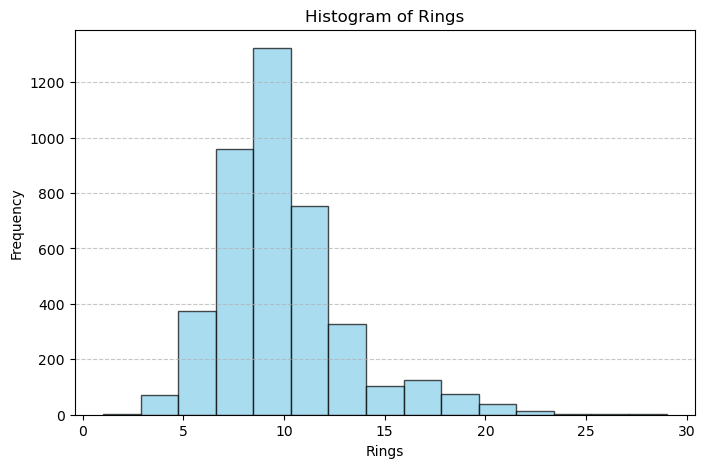

In [2]:

# Plot 1: Histogram for the distribution of "Rings"
def histogram(data, column, bins=15):
    """
    Creates a histogram for the one colum column in the dataset.

   
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


histogram(data_new, 'Rings') 


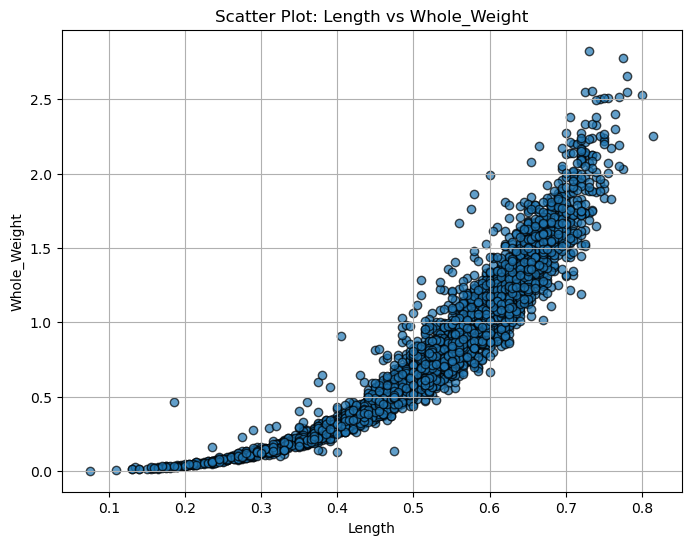

In [3]:
# Plot 2: Scatter plot for length vs weight
def scatter(data, x_col, y_col):
    """
    Creates a scatter plot between len vs whole weight in the dataset.

    
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], alpha=0.7, edgecolor='k')
    plt.title(f"Scatter Plot: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()
scatter(data_new, 'Length', 'Whole_Weight')

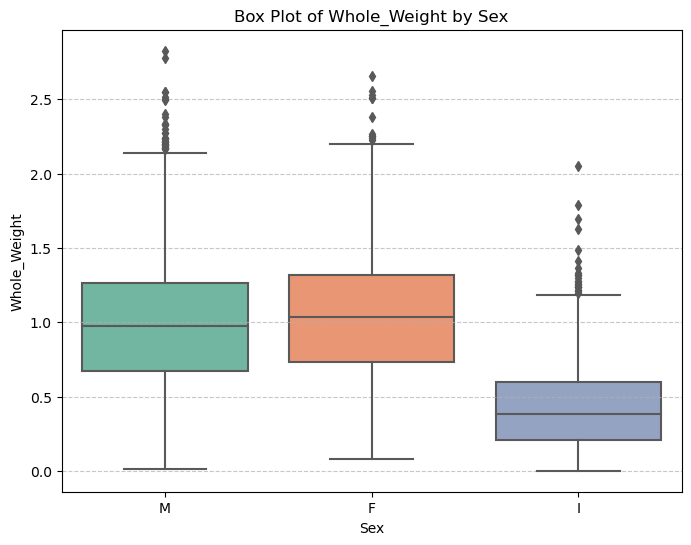

In [4]:
# Plot 3: Box plot for "Sex" vs "Whole_Weight"
def visualize_boxplot(data, x_col, y_col):
    """
    Creates a box plot to visualize distributions of the dependent variable grouped by a categorical column.

    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[x_col], y=data[y_col], palette="Set2")
    plt.title(f"Box Plot of {y_col} by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
visualize_boxplot(data_new, 'Sex', 'Whole_Weight') 

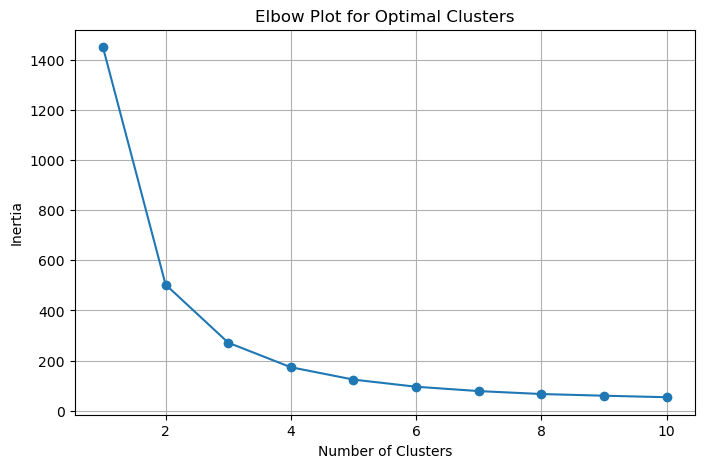

In [5]:
# Plot 4: Elbow plot for determining optimal clusters
def plot_elbow(data, max_clusters=10):
    """
    Creates an elbow plot to determine the optimal number of clusters using k-means.

   
    """
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title("Elbow Plot for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
plot_elbow(data_new.drop(columns=['Sex', 'Rings']), max_clusters=10)

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


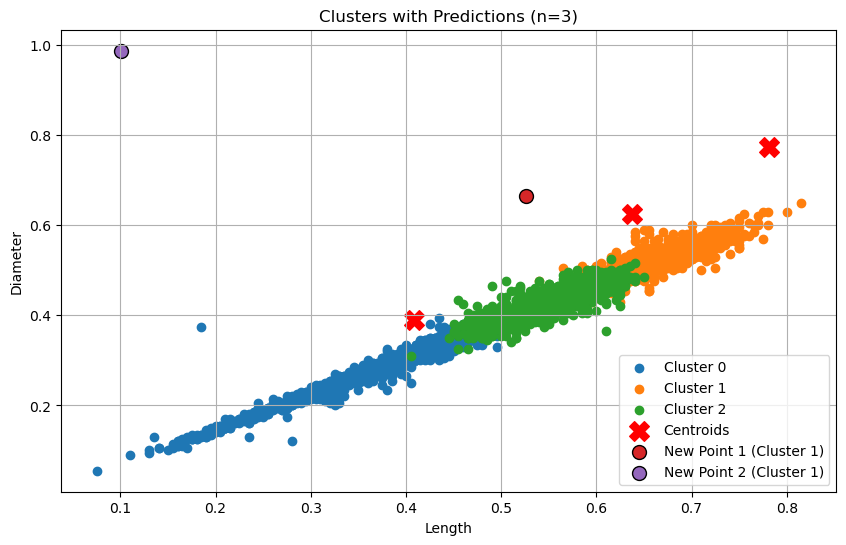

Silhouette Score for 3 clusters: 0.46
New Points:
[[0.52631101 0.66543062 0.69508022 0.8805046  0.94722417 0.39901936
  0.50147358]
 [0.10105316 0.98721927 0.08882182 0.01939329 0.15152799 0.95778223
  0.17573728]]
Predicted Clusters for New Points:
[1 1]


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure new points match the dataset's feature count
feature_count = data_new.drop(columns=['Sex', 'Rings']).shape[1]
new_points_clustering = np.random.rand(2, feature_count)  # Generate random points with correct dimensions

# Function for clustering with normalization, back-scaling, and predictions
def perform_clustering_with_predictions(data, n_clusters, new_points):
    """
    Performs k-means clustering on normalized data and predicts clusters for  data points.

    
    """
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    # Back-scale data for presentation
    clustered_data = pd.DataFrame(scaler.inverse_transform(normalized_data), columns=data.columns)
    clustered_data['Cluster'] = labels
    # Predict clusters for new data points
    normalized_new_points = scaler.transform(new_points)
    predicted_labels = kmeans.predict(normalized_new_points)
    back_scaled_points = scaler.inverse_transform(normalized_new_points)
    
    # clusters and predictions
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f"Cluster {cluster}")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    #  new points with predictions
    for i, point in enumerate(back_scaled_points):
        plt.scatter(point[0], point[1], label=f"New Point {i+1} (Cluster {predicted_labels[i]})", edgecolor='k', s=100)
    
    plt.title(f"Clusters with Predictions (n={n_clusters})")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display silhouette score
    silhouette_avg = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")
    
    return clustered_data, predicted_labels

# Perform clustering with predictions
clustered_data, predicted_clusters = perform_clustering_with_predictions(
    data_new.drop(columns=['Sex', 'Rings']), n_clusters=3, new_points=new_points_clustering
)

print(f"New Points:\n{new_points_clustering}")
print(f"Predicted Clusters for New Points:\n{predicted_clusters}")


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 0.19


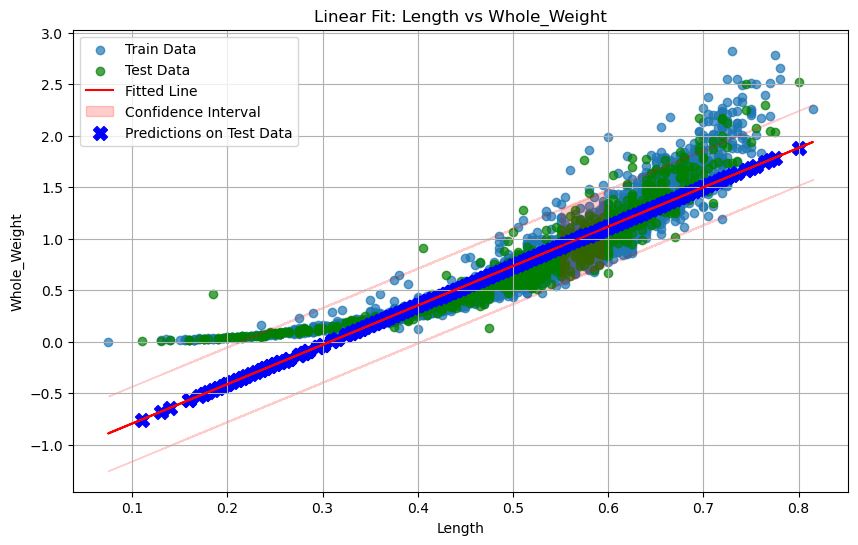

Fitting results with predictions:
     Length  Whole_Weight  Predicted  Lower CI  Upper CI
0     0.605        1.1035   1.136779  0.774060  1.499498
1     0.590        0.8725   1.079441  0.716722  1.442160
2     0.560        0.9810   0.964765  0.602046  1.327484
3     0.635        1.2615   1.251455  0.888736  1.614174
4     0.475        0.6175   0.639849  0.277130  1.002568
..      ...           ...        ...       ...       ...
831   0.520        0.7280   0.811863  0.449144  1.174582
832   0.595        0.9000   1.098554  0.735835  1.461273
833   0.545        0.7420   0.907427  0.544708  1.270145
834   0.465        0.5805   0.601623  0.238904  0.964342
835   0.365        0.2230   0.219369 -0.143350  0.582088

[836 rows x 5 columns]


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_new, test_size=0.2, random_state=42)

# Function for fitting with train-test split and predictions
def fitting_and_predictions(train_data, test_data, x_col, y_col):
    """
   trains the model an dtests the trained model plotted with error bars and confidence levels
    
    """
    

    # Split data into features and target
    x_train = train_data[[x_col]].values
    y_train = train_data[y_col].values
    x_test = test_data[[x_col]].values
    y_test = test_data[y_col].values

    # Train linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predictions on test data
    y_pred = model.predict(x_test)
    test_error = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Test RMSE: {test_error:.2f}")

    # Generate confidence intervals
    residuals = y_train - model.predict(x_train)
    std_error = np.std(residuals)
    conf_interval = 1.96 * std_error  # 95% confidence interval

    # Plot train data, fitted line, and test predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label='Train Data', alpha=0.7)
    plt.scatter(x_test, y_test, label='Test Data', alpha=0.7, color='green')
    plt.plot(x_train, model.predict(x_train), color='red', label='Fitted Line')
    plt.fill_between(x_train.flatten(), 
                     model.predict(x_train) - conf_interval, 
                     model.predict(x_train) + conf_interval, 
                     color='red', alpha=0.2, label='Confidence Interval')
    plt.scatter(x_test, y_pred, label='Predictions on Test Data', color='blue', marker='X', s=100)
    plt.title(f"Linear Fit: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a DataFrame for test predictions
    test_results = pd.DataFrame({x_col: x_test.flatten(), 
                                 y_col: y_test, 
                                 'Predicted': y_pred, 
                                 'Lower CI': y_pred - conf_interval, 
                                 'Upper CI': y_pred + conf_interval})
    
    return test_results

# Perform fitting with predictions
fitting_results = fitting_and_predictions(train_data, test_data, x_col='Length', y_col='Whole_Weight')
print(f"Fitting results with predictions:\n{fitting_results}")
